2021_1019-Ahmet Anıl Dindar

---

# CE311 Theory of Structures 1 


## Week04  Shear and Moment Diagrams
---

## Example 1 

Draw the shear and moment diagrams for the beam.

<img src="figures/1-Simple_Beam.png" width="800">

Now think about the arbitrary cross section at a x distance.

<img src="figures/1-Simple_Beam_2.png"  width= "300">

In [59]:
def simple_beam_uniform_load( q , l, plot = False):
    """
    q : Uniform Load ( kN/m)
    l : Length (m)
    
    Return
    
    Support reactions (SR_left , SR_right)
    Shear values 
    Moment values
    
    Plot (optional)
    """
    # Support reaction
    SR_left = SR_right = 0.5*q*l
    
    # Shear function
    V_function = lambda x : SR_left - q * x
    V_values = list( map( V_function , range(l+1)))
    
    # Moment function
    M_function = lambda x : SR_left * x - q*x*(x/2)
    M_values = list( map( M_function , range(l+1)))
    
    # Plots
    if plot == True : 
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot( range(l+1) , V_values, label="Shear")
        plt.fill_between( range(l+1) , M_values, label="Moment", alpha=0.5)
        plt.axhline(c="k")
        plt.xlim( 0 , l)
        plt.box(False)
        plt.legend()   
    return( SR_left , SR_right, V_values , M_values)

(25.0,
 25.0,
 [25.0, 15.0, 5.0, -5.0, -15.0, -25.0],
 [0.0, 20.0, 30.0, 30.0, 20.0, 0.0])

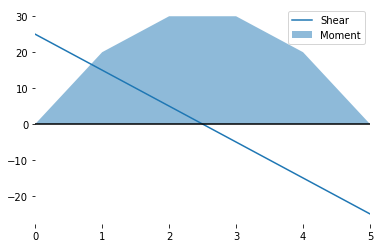

In [60]:
simple_beam_uniform_load(10 , 5 , True)

In [56]:
def simple_beam_uniform_load_student( q , l , plot_visible = False):
    import numpy as np
    # Calculation of the support reactions
    SR_left = q * l * 0.5
    SR_right = SR_left
    # 
    spacing = np.arange(0,l+1,0.1)
    # Shear Function
    V_values =  []
    for x in spacing :
        #print( x )
        V_values.append( SR_left - q * x)
    # Moment function
    M_values =  []

    for x in spacing:
        M_values.append( SR_left * x - (q*x)*(x/2))
    
    if plot_visible == True : 
        # Visualization
        import matplotlib.pyplot as plt

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(spacing, V_values, 'g-' )
        ax2.plot(spacing, M_values, 'b-')

        ax1.set_xlabel('x (m)')
        ax1.set_ylabel('Shear (kN)', color='g')
        ax2.set_ylabel('Moment (kNm)', color='b')
        plt.xlim(0,l)
        plt.show()

    return( SR_left , SR_right , V_values , M_values)

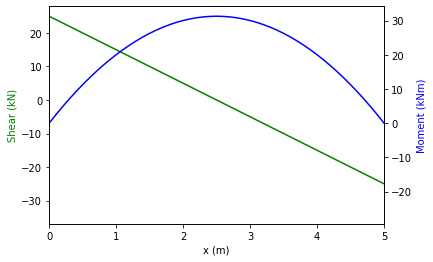

In [57]:
q = 10 # kn/m
l = 5 # m

Ay , By , V , M = simple_beam_uniform_load_student( q , l  , plot_visible=True)


In [58]:
Ay, By , V ,M

(25.0,
 25.0,
 [25.0,
  24.0,
  23.0,
  22.0,
  21.0,
  20.0,
  19.0,
  18.0,
  17.0,
  16.0,
  15.0,
  14.0,
  12.999999999999998,
  12.0,
  10.999999999999998,
  10.0,
  9.0,
  8.0,
  7.0,
  6.0,
  5.0,
  4.0,
  3.0,
  1.9999999999999964,
  0.9999999999999964,
  0.0,
  -1.0,
  -2.0,
  -3.0000000000000036,
  -4.0000000000000036,
  -5.0,
  -6.0,
  -7.0,
  -8.0,
  -9.0,
  -10.0,
  -11.0,
  -12.0,
  -13.0,
  -14.0,
  -15.0,
  -16.000000000000007,
  -17.0,
  -18.0,
  -19.0,
  -20.0,
  -21.000000000000007,
  -22.0,
  -23.000000000000007,
  -24.0,
  -25.0,
  -26.000000000000007,
  -27.0,
  -28.000000000000007,
  -29.0,
  -30.0,
  -31.000000000000007,
  -32.0,
  -33.00000000000001,
  -34.0],
 [0.0,
  2.45,
  4.8,
  7.050000000000001,
  9.2,
  11.25,
  13.200000000000001,
  15.049999999999999,
  16.8,
  18.45,
  20.0,
  21.450000000000003,
  22.8,
  24.049999999999997,
  25.199999999999996,
  26.25,
  27.2,
  28.050000000000004,
  28.8,
  29.45,
  30.0,
  30.45,
  30.800000000000004,
  31.05,

V(x) + q * x - Ay = 0
V(x) = Ay - q * x

---
M(x) + (q * x) * (x / 2) - (Ay * x) = 0
M(x) = -(q * x) * (x / 2) + (Ay * x) 



## Example 2 

Draw the shear and moment diagrams for the beam.

<img src="figures/2-Simple_Beam_1.png" width="600">

<img src="figures/2-Simple_Beam_1_loading.png" width="600">

<img src="figures/hadibe.png" width="600">


In [68]:
def simple_beam_triangel_load_student( q_left , q_right , l , plot_visible = False):
    """
    q_left , 
    q_right , 
    l , 
    plot_visible = False
    
    """
    import numpy as np
    # Calculation of the support reactions
    SR_left = (0.5*q_right * l) * 1/3 if q_left == 0  else  (0.5*q_right*l)*2/3
    SR_right = (0.5*q_right * l) - SR_left
    # 
    spacing = np.arange(0,l+1,0.1)
    # Shear Function
    V_values =  []
    for x in spacing :
        #print( x )
        if q_left == 0 : 
            q_section = (x/l)* q_right
            V_values.append( SR_left - q_section * x * 0.5) 
            
        else : 
            q_section = ((l-x)/l)* q_left
            V_values.append( SR_left - (q_section * x + 0.5*x(q_left-q_section))  )


    # Moment function
    
    
    from scipy import integrate
    
    M_values =  integrate.cumtrapz( V_values , spacing  , initial = 0 )
        
    
    if plot_visible == True : 
        # Visualization
        import matplotlib.pyplot as plt

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(spacing, V_values, 'g-' )
        ax2.plot(spacing, M_values, 'b-')

        ax1.set_xlabel('x (m)')
        ax1.set_ylabel('Shear (kN)', color='g')
        ax2.set_ylabel('Moment (kNm)', color='b')
        plt.xlim(0,l)
        plt.show()

    return( SR_left , SR_right , V_values, M_values)


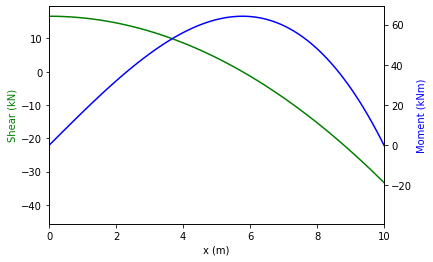

In [69]:
Ay, By , V , M = simple_beam_triangel_load_student( q_left=0 , q_right=10 , l=10 , plot_visible = True)

In [70]:
M[0]

0.0

In [72]:
M

array([ 0.00000000e+00,  1.66641667e+00,  3.33183333e+00,  4.99525000e+00,
        6.65566667e+00,  8.31208333e+00,  9.96350000e+00,  1.16089167e+01,
        1.32473333e+01,  1.48777500e+01,  1.64991667e+01,  1.81105833e+01,
        1.97110000e+01,  2.12994167e+01,  2.28748333e+01,  2.44362500e+01,
        2.59826667e+01,  2.75130833e+01,  2.90265000e+01,  3.05219167e+01,
        3.19983333e+01,  3.34547500e+01,  3.48901667e+01,  3.63035833e+01,
        3.76940000e+01,  3.90604167e+01,  4.04018333e+01,  4.17172500e+01,
        4.30056667e+01,  4.42660833e+01,  4.54975000e+01,  4.66989167e+01,
        4.78693333e+01,  4.90077500e+01,  5.01131667e+01,  5.11845833e+01,
        5.22210000e+01,  5.32214167e+01,  5.41848333e+01,  5.51102500e+01,
        5.59966667e+01,  5.68430833e+01,  5.76485000e+01,  5.84119167e+01,
        5.91323333e+01,  5.98087500e+01,  6.04401667e+01,  6.10255833e+01,
        6.15640000e+01,  6.20544167e+01,  6.24958333e+01,  6.28872500e+01,
        6.32276667e+01,  

## Example 3 

Draw the shear and moment diagrams for the beam.

<img src="figures/3-Cantilever_Beam_1.png">